In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df_claim = pd.read_csv('BGCON_CLAIM_DATA.csv', encoding = 'utf-8', dtype={'HOSP_SPEC_DVSN':str})

In [3]:
df_claim.columns

Index(['CUST_ID', 'POLY_NO', 'ACCI_OCCP_GRP1', 'ACCI_OCCP_GRP2', 'CHANG_FP_YN',
       'CNTT_RECP_SQNO', 'RECP_DATE', 'ORIG_RESN_DATE', 'RESN_DATE',
       'CRNT_PROG_DVSN', 'ACCI_DVSN', 'CAUS_CODE', 'CAUS_CODE_DTAL',
       'DSAS_NAME', 'DMND_RESN_CODE', 'DMND_RSCD_SQNO', 'HOSP_OTPA_STDT',
       'HOSP_OTPA_ENDT', 'RESL_CD1', 'RESL_NM1', 'VLID_HOSP_OTDA',
       'HOUSE_HOSP_DIST', 'HOSP_CODE', 'ACCI_HOSP_ADDR', 'HOSP_SPEC_DVSN',
       'CHME_LICE_NO', 'PAYM_DATE', 'DMND_AMT', 'PAYM_AMT', 'PMMI_DLNG_YN',
       'SELF_CHAM', 'NON_PAY', 'TAMT_SFCA', 'PATT_CHRG_TOTA', 'DSCT_AMT',
       'COUNT_TRMT_ITEM', 'DCAF_CMPS_XCPA', 'NON_PAY_RATIO', 'HEED_HOSP_YN'],
      dtype='object')

In [4]:
df_claim.isnull().sum()

CUST_ID                 0
POLY_NO                 0
ACCI_OCCP_GRP1       1417
ACCI_OCCP_GRP2       1417
CHANG_FP_YN             0
CNTT_RECP_SQNO          0
RECP_DATE               0
ORIG_RESN_DATE          0
RESN_DATE               0
CRNT_PROG_DVSN          0
ACCI_DVSN               0
CAUS_CODE               0
CAUS_CODE_DTAL          0
DSAS_NAME               0
DMND_RESN_CODE          0
DMND_RSCD_SQNO          0
HOSP_OTPA_STDT      32571
HOSP_OTPA_ENDT      32571
RESL_CD1                0
RESL_NM1                0
VLID_HOSP_OTDA          0
HOUSE_HOSP_DIST     17048
HOSP_CODE               9
ACCI_HOSP_ADDR      10070
HOSP_SPEC_DVSN          9
CHME_LICE_NO            0
PAYM_DATE              13
DMND_AMT                0
PAYM_AMT                0
PMMI_DLNG_YN            0
SELF_CHAM          100053
NON_PAY            100053
TAMT_SFCA          100053
PATT_CHRG_TOTA     100053
DSCT_AMT           100053
COUNT_TRMT_ITEM    100053
DCAF_CMPS_XCPA     110963
NON_PAY_RATIO           0
HEED_HOSP_YN

In [5]:
df_claim = df_claim.drop(['ACCI_OCCP_GRP1','ACCI_OCCP_GRP2','CHANG_FP_YN','CNTT_RECP_SQNO','ORIG_RESN_DATE','RESN_DATE','CRNT_PROG_DVSN',
                          'SELF_CHAM','NON_PAY','TAMT_SFCA','PATT_CHRG_TOTA','DSCT_AMT','COUNT_TRMT_ITEM','DCAF_CMPS_XCPA','HOUSE_HOSP_DIST',
                          'DMND_RSCD_SQNO','HOSP_OTPA_STDT','HOSP_OTPA_ENDT','ACCI_HOSP_ADDR','PAYM_DATE'], axis=1)
df_claim.isnull().sum()

CUST_ID           0
POLY_NO           0
RECP_DATE         0
ACCI_DVSN         0
CAUS_CODE         0
CAUS_CODE_DTAL    0
DSAS_NAME         0
DMND_RESN_CODE    0
RESL_CD1          0
RESL_NM1          0
VLID_HOSP_OTDA    0
HOSP_CODE         9
HOSP_SPEC_DVSN    9
CHME_LICE_NO      0
DMND_AMT          0
PAYM_AMT          0
PMMI_DLNG_YN      0
NON_PAY_RATIO     0
HEED_HOSP_YN      0
dtype: int64

In [6]:
df_claim = df_claim.drop(['CHME_LICE_NO','DMND_AMT','PAYM_AMT' ], axis=1)
df_claim.isnull().sum()
'RESL_CD1', 'RESL_NM1', 'CAUS_CODE', 'CAUS_CODE_DTAL' 

('RESL_CD1', 'RESL_NM1', 'CAUS_CODE', 'CAUS_CODE_DTAL')

In [7]:
df_claim = df_claim.drop(['RESL_CD1', 'RESL_NM1', 'CAUS_CODE', 'CAUS_CODE_DTAL','NON_PAY_RATIO'], axis=1)

In [8]:
df_claim

,CUST_ID,POLY_NO,RECP_DATE,ACCI_DVSN,DSAS_NAME,DMND_RESN_CODE,VLID_HOSP_OTDA,HOSP_CODE,HOSP_SPEC_DVSN,PMMI_DLNG_YN,HEED_HOSP_YN
0,5936,1365,20060112,1,하악부표재성손상,3,2,12537.0,95,N,N
1,5936,6151,20060112,1,하악부표재성손상,3,2,12537.0,95,N,N
2,5936,10364,20060112,1,하악부표재성손상,3,2,12537.0,95,N,N
3,1043,1247,20060112,3,기타세균성창자감염|손목및손의2도화상|피부염,2,6,12537.0,95,N,N
4,8545,11236,20060112,3,좌측하지정맥류혈관발거술|레이저소작술,5,0,2305.0,30,N,N
...,...,...,...,...,...,...,...,...,...,...,...
119015,15545,48830,20150303,3,자기부담금 추가지급(Auto),3,4,7577.0,20,Y,N
119016,15489,110348,20150513,1,자기부담금 추가지급(Auto),3,1,10968.0,30,Y,N
119017,6864,110453,20150618,3,자기부담금 추가지급(Auto),2,10,8352.0,20,Y,N
119018,15545,48830,20150618,3,자기부담금 추가지급(Auto),3,1,7577.0,20,Y,N


In [9]:
import pickle
with open("df_cust.pickle","rb") as fr:
    df_cust = pickle.load(fr)

In [10]:
df_cust = df_cust.drop(['SEX', 'AGE', 'RESI_COST', 'RESI_TYPE_CODE',
       'FP_CAREER', 'CUST_RGST', 'CTPR', 'OCCP_GRP_1', 'OCCP_GRP_2',
       'TOTALPREM', 'MINCRDT', 'MAXCRDT', 'WEDD_YN', 'MATE_OCCP_GRP_1',
       'MATE_OCCP_GRP_2', 'CHLD_CNT', 'CUST_INCM', 'RCBASE_HSHD_INCM',
       'JPBASE_HSHD_INCM', 'year', 'month'], axis=1)

In [11]:
df_claim = pd.merge(df_claim, df_cust, on = 'CUST_ID', how = 'inner')

In [12]:
df_claim_yes = df_claim[df_claim['SIU_CUST_YN']=='Y']
df_claim_no = df_claim[df_claim['SIU_CUST_YN']=='N']

In [13]:
set(df_claim['ACCI_DVSN'])

{1, 2, 3}

<AxesSubplot:xlabel='ACCI_DVSN', ylabel='count'>

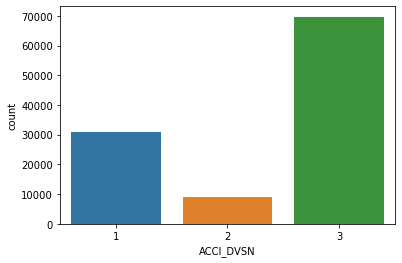

In [14]:
sns.countplot(x = 'ACCI_DVSN', data = df_claim)

<AxesSubplot:xlabel='ACCI_DVSN', ylabel='count'>

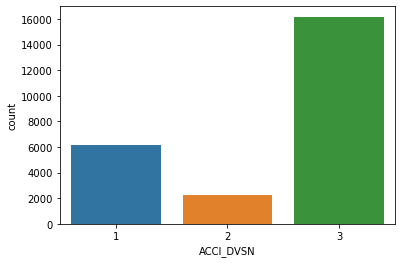

In [15]:
sns.countplot(x = 'ACCI_DVSN', data = df_claim_yes)

<AxesSubplot:xlabel='ACCI_DVSN', ylabel='count'>

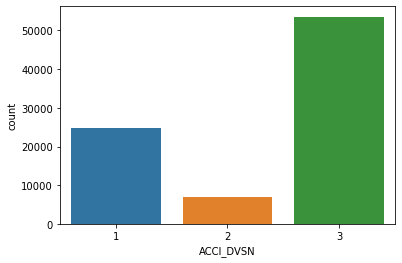

In [16]:
sns.countplot(x = 'ACCI_DVSN', data = df_claim_no)

In [17]:
df_claim_yes['ACCI_DVSN'].value_counts(normalize=False)

3    16172
1     6168
2     2224
Name: ACCI_DVSN, dtype: int64

In [18]:
df_claim_no['ACCI_DVSN'].value_counts(normalize=False)

3    53517
1    24840
2     6852
Name: ACCI_DVSN, dtype: int64

In [19]:
df_claim['SIU_CUST_YN'].value_counts()

N    85209
Y    24564
Name: SIU_CUST_YN, dtype: int64

In [20]:
import numpy as np
from scipy.stats import chi2_contingency

# 주어진 데이터셋 (예시)
data = np.array([[53517, 85209-53517], [16172, 24564-16172]])  # 사고3인 경우와 아닌 경우에 대한 교차표

# 카이제곱 검정 수행
chi2, p_value, _, _ = chi2_contingency(data)
print(p_value)
# 유의성 검정 결과 출력
if p_value < 0.05:
    print("귀무가설을 기각합니다. 사고구분코드3과 보험 사기 여부 간에 유의한 관련성이 있습니다.")
else:
    print("귀무가설을 기각할 수 없습니다. 사고구분코드3과 보험 사기 여부 간에 유의한 관련성이 없습니다.")


3.930965386110012e-18
귀무가설을 기각합니다. 사고구분코드3과 보험 사기 여부 간에 유의한 관련성이 있습니다.


In [21]:
set(df_claim['DMND_RESN_CODE'])

{1, 2, 3, 4, 5, 6, 7, 9}

<AxesSubplot:xlabel='DMND_RESN_CODE', ylabel='count'>

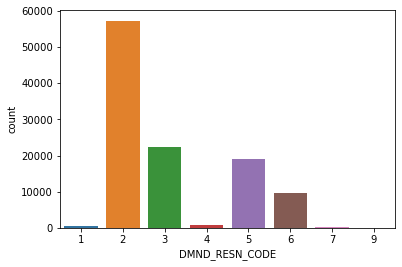

In [22]:
sns.countplot(x = 'DMND_RESN_CODE', data = df_claim)

<AxesSubplot:xlabel='DMND_RESN_CODE', ylabel='count'>

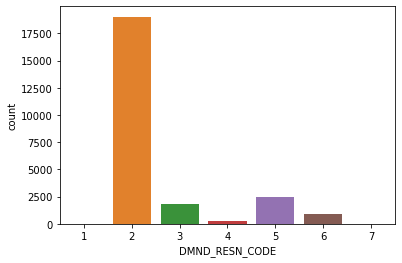

In [23]:
sns.countplot(x = 'DMND_RESN_CODE', data = df_claim_yes)

<AxesSubplot:xlabel='DMND_RESN_CODE', ylabel='count'>

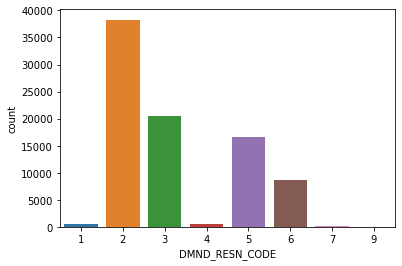

In [24]:
sns.countplot(x = 'DMND_RESN_CODE', data = df_claim_no)

In [25]:
df_claim_yes['DMND_RESN_CODE'].value_counts(normalize=True)

2    0.774792
5    0.100472
3    0.073359
6    0.038308
4    0.011440
1    0.001466
7    0.000163
Name: DMND_RESN_CODE, dtype: float64

In [26]:
df_claim_no['DMND_RESN_CODE'].value_counts(normalize=True)

2    0.448990
3    0.241101
5    0.194275
6    0.101210
4    0.006584
1    0.006020
7    0.001760
9    0.000059
Name: DMND_RESN_CODE, dtype: float64

In [27]:
set(df_claim['VLID_HOSP_OTDA'])

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 149,
 150,
 152,
 154,
 155,
 156,
 157,
 162,
 163,
 165,
 166,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 177,
 182,
 183,
 186,
 190,
 195,
 205,
 208,
 212,
 216,
 228,
 235,
 237,
 267,
 274,
 307,
 308,
 373,
 578}

<AxesSubplot:xlabel='VLID_HOSP_OTDA', ylabel='Density'>

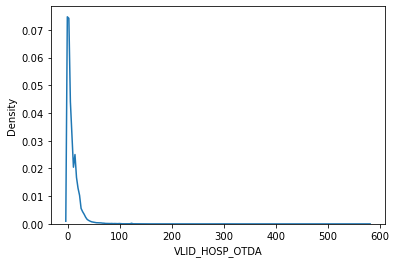

In [87]:
sns.kdeplot(x = 'VLID_HOSP_OTDA', data = df_claim)

<AxesSubplot:xlabel='VLID_HOSP_OTDA', ylabel='Density'>

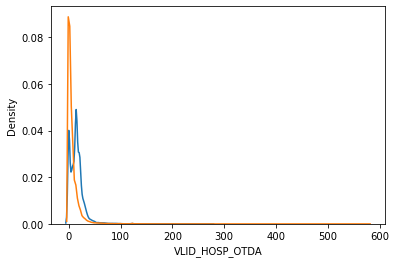

In [90]:
sns.kdeplot(x = 'VLID_HOSP_OTDA', data = df_claim_yes)
sns.kdeplot(x = 'VLID_HOSP_OTDA', data = df_claim_no)

In [29]:
np.mean(df_claim_yes['VLID_HOSP_OTDA'])

14.94418661455789

In [30]:
np.mean(df_claim_no['VLID_HOSP_OTDA'])

6.925923317959371

In [31]:
np.max(df_claim_no['VLID_HOSP_OTDA'])

578

In [32]:
import numpy as np
from scipy.stats import ttest_ind

# 데이터 (예시)
group1_income = df_claim_yes['VLID_HOSP_OTDA']  # 사기를 치는 경우의 입원기간
group2_income = df_claim_no['VLID_HOSP_OTDA']  # 안 치는 경우의 입원기간

# 독립표본 t-test 수행
t_statistic, p_value = ttest_ind(group1_income, group2_income)
print(p_value)
print(t_statistic)
# 유의성 검정 결과 출력
if p_value < 0.05:
    print("귀무가설을 기각합니다. 사기를 치는 집단의 입원기간과 안 치는 집단의 입원기간의 차이는 유의미합니다.")
else:
    print("귀무가설을 기각할 수 없습니다. 사기를 치는 집단의 입원기간과 안 치는 집단의 입원기간의 차이는 유의미하지 않습니다.")

0.0
87.18094380894827
귀무가설을 기각합니다. 사기를 치는 집단의 입원기간과 안 치는 집단의 입원기간의 차이는 유의미합니다.


In [33]:
set(df_claim['HOSP_SPEC_DVSN'])

{'10', '20', '25', '30', '40', '45', '60', '70', '80', '85', '90', '95', nan}

<AxesSubplot:xlabel='HOSP_SPEC_DVSN', ylabel='count'>

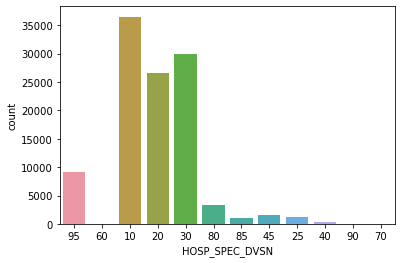

In [34]:
sns.countplot(x = 'HOSP_SPEC_DVSN', data = df_claim)

<AxesSubplot:xlabel='HOSP_SPEC_DVSN', ylabel='count'>

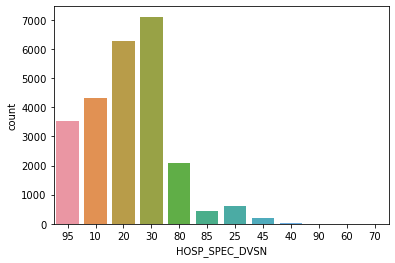

In [35]:
sns.countplot(x = 'HOSP_SPEC_DVSN', data = df_claim_yes)

<AxesSubplot:xlabel='HOSP_SPEC_DVSN', ylabel='count'>

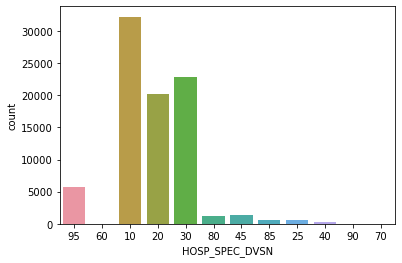

In [36]:
sns.countplot(x = 'HOSP_SPEC_DVSN', data = df_claim_no)

In [37]:
df_claim_yes['HOSP_SPEC_DVSN'].value_counts(normalize=True).sort_index()

10    0.175522
20    0.255161
25    0.024307
30    0.289158
40    0.000651
45    0.007736
60    0.000285
70    0.000285
80    0.085420
85    0.017792
90    0.000285
95    0.143398
Name: HOSP_SPEC_DVSN, dtype: float64

In [38]:
df_claim_no['HOSP_SPEC_DVSN'].value_counts(normalize=True).sort_index()
#25(요양병원), 80(한방병원), 85(한의원), 95(의료기관이외)에서 확연한 차이를 보임.

10    0.377956
20    0.237832
25    0.006878
30    0.267690
40    0.002829
45    0.016736
60    0.000469
70    0.000610
80    0.014870
85    0.006467
90    0.000669
95    0.066993
Name: HOSP_SPEC_DVSN, dtype: float64

In [39]:
set(df_claim['PMMI_DLNG_YN'])

{'N', 'Y'}

<AxesSubplot:xlabel='PMMI_DLNG_YN', ylabel='count'>

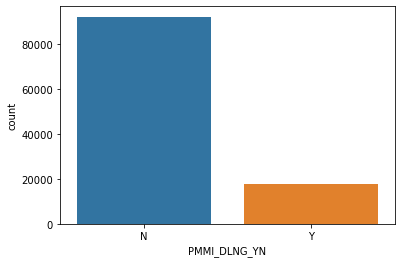

In [40]:
sns.countplot(x = 'PMMI_DLNG_YN', data = df_claim)

<AxesSubplot:xlabel='PMMI_DLNG_YN', ylabel='count'>

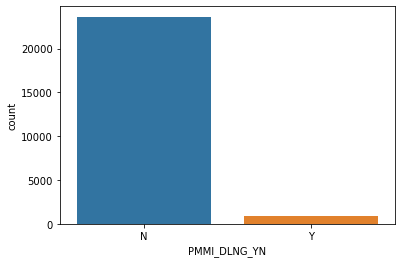

In [41]:
sns.countplot(x = 'PMMI_DLNG_YN', data = df_claim_yes)

<AxesSubplot:xlabel='PMMI_DLNG_YN', ylabel='count'>

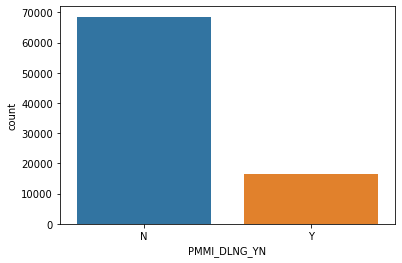

In [42]:
sns.countplot(x = 'PMMI_DLNG_YN', data = df_claim_no)

In [44]:
set(df_claim['HEED_HOSP_YN'])

{'N', 'Y'}

<AxesSubplot:xlabel='HEED_HOSP_YN', ylabel='count'>

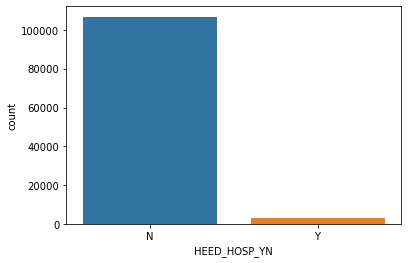

In [45]:
sns.countplot(x = 'HEED_HOSP_YN', data = df_claim)

<AxesSubplot:xlabel='HEED_HOSP_YN', ylabel='count'>

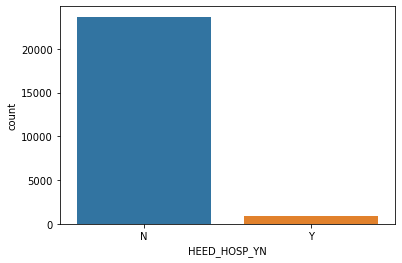

In [46]:
sns.countplot(x = 'HEED_HOSP_YN', data = df_claim_yes)

<AxesSubplot:xlabel='HEED_HOSP_YN', ylabel='count'>

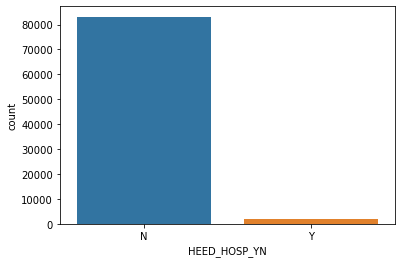

In [47]:
sns.countplot(x = 'HEED_HOSP_YN', data = df_claim_no)

In [48]:
df_claim_yes['HEED_HOSP_YN'].value_counts(normalize = True)

N    0.963646
Y    0.036354
Name: HEED_HOSP_YN, dtype: float64

In [49]:
df_claim_no['HEED_HOSP_YN'].value_counts(normalize = True)

N    0.97519
Y    0.02481
Name: HEED_HOSP_YN, dtype: float64

In [50]:
import numpy as np
from scipy.stats import chi2_contingency

# 주어진 데이터셋 (예시)
data = np.array([[2114, 83095], [893, 23671]])  # 유의병원 경우와 아닌 경우에 대한 교차표

# 카이제곱 검정 수행
chi2, p_value, _, _ = chi2_contingency(data)
print(p_value)
# 유의성 검정 결과 출력
if p_value < 0.05:
    print("귀무가설을 기각합니다. 유의병원과 보험 사기 여부 간에 유의한 관련성이 있습니다.")
else:
    print("귀무가설을 기각할 수 없습니다. 유의병원과 보험 사기 여부 간에 유의한 관련성이 없습니다.")


1.9550669516383214e-22
귀무가설을 기각합니다. 유의병원과 보험 사기 여부 간에 유의한 관련성이 있습니다.


In [54]:
df_claim['RECP_DATE'] = df_claim['RECP_DATE'].astype(str)

In [55]:
df_claim['RECP_DATE']

0         20060112
1         20060112
2         20060112
3         20070824
4         20070824
            ...   
109768    20160621
109769    20160621
109770    20160621
109771    20160621
109772    20160621
Name: RECP_DATE, Length: 109773, dtype: object

In [57]:
df_claim['RECP_DATE'][0][0:4]

'2006'

In [58]:
df_claim['year'] = df_claim['RECP_DATE'].apply(lambda x : x[0:4])

In [61]:
df_claim['year'].unique()

array(['2006', '2007', '2009', '2012', '2013', '2015', '2008', '2011',
       '2010', '2014', '2016'], dtype=object)

In [62]:
df_claim_yes = df_claim[df_claim['SIU_CUST_YN']=='Y']
df_claim_no = df_claim[df_claim['SIU_CUST_YN']=='N']

<AxesSubplot:xlabel='year', ylabel='count'>

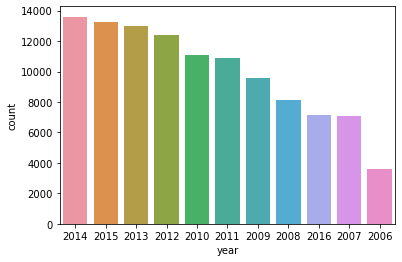

In [72]:
sns.countplot(x = 'year', data = df_claim, order = df_claim['year'].value_counts().index)

<AxesSubplot:xlabel='year', ylabel='count'>

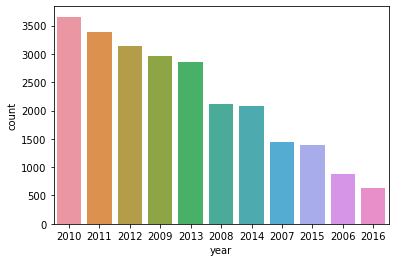

In [73]:
sns.countplot(x = 'year', data = df_claim_yes, order = df_claim_yes['year'].value_counts().index)

<AxesSubplot:xlabel='year', ylabel='count'>

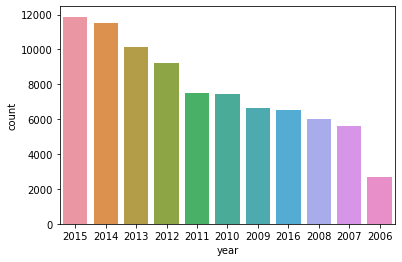

In [74]:
sns.countplot(x = 'year', data = df_claim_no, order = df_claim_no['year'].value_counts().index)

In [83]:
yes = df_claim_yes['year'].value_counts(normalize = True).sort_index()
yes

2006    0.035458
2007    0.059029
2008    0.086020
2009    0.120379
2010    0.148917
2011    0.138210
2012    0.128114
2013    0.116349
2014    0.084514
2015    0.056994
2016    0.026014
Name: year, dtype: float64

In [84]:
no = df_claim_no['year'].value_counts(normalize = True).sort_index()
no

2006    0.031710
2007    0.065944
2008    0.070239
2009    0.077973
2010    0.087526
2011    0.088242
2012    0.108451
2013    0.118943
2014    0.135232
2015    0.139351
2016    0.076389
Name: year, dtype: float64

In [81]:
import numpy as np
from scipy.stats import chi2_contingency

for i in range(10):
    a = yes[i]
    b = 24564 - yes[i]
    c = no[i]
    d = 85209- no[i]

    data = np.array([[a, b], [c, d]])  # 각 연도인 경우와 아닌 경우에 대한 교차표
    chi2, p_value, _, _ = chi2_contingency(data)
    if p_value < 0.05:
        print("귀무가설을 기각합니다. 연도와 보험 사기 여부 간에 유의한 관련성이 있습니다.")
    else:
        print("귀무가설을 기각할 수 없습니다. 연도와 보험 사기 여부 간에 유의한 관련성이 없습니다.")

귀무가설을 기각합니다. 지역과 보험 사기 여부 간에 유의한 관련성이 있습니다.
귀무가설을 기각합니다. 지역과 보험 사기 여부 간에 유의한 관련성이 있습니다.
귀무가설을 기각합니다. 지역과 보험 사기 여부 간에 유의한 관련성이 있습니다.
귀무가설을 기각합니다. 지역과 보험 사기 여부 간에 유의한 관련성이 있습니다.
귀무가설을 기각합니다. 지역과 보험 사기 여부 간에 유의한 관련성이 있습니다.
귀무가설을 기각합니다. 지역과 보험 사기 여부 간에 유의한 관련성이 있습니다.
귀무가설을 기각합니다. 지역과 보험 사기 여부 간에 유의한 관련성이 있습니다.
귀무가설을 기각할 수 없습니다. 지역과 보험 사기 여부 간에 유의한 관련성이 없습니다.
귀무가설을 기각합니다. 지역과 보험 사기 여부 간에 유의한 관련성이 있습니다.
귀무가설을 기각합니다. 지역과 보험 사기 여부 간에 유의한 관련성이 있습니다.


In [91]:
from pandasql import sqldf
dfsql = lambda q: sqldf(q, globals())

In [93]:
claim_cnt = dfsql('''select CUST_ID, count(CUST_ID), SIU_CUST_YN from df_claim group by CUST_ID''')
claim_cnt

,CUST_ID,count(CUST_ID),SIU_CUST_YN
0,1,4,N
1,2,3,N
2,3,1,N
3,4,9,N
4,5,1,N
...,...,...,...
20602,22396,3,N
20603,22397,1,N
20604,22398,2,N
20605,22399,1,N


In [94]:
import pickle
with open("claim_cnt.pickle","wb") as fw:
    pickle.dump(claim_cnt, fw)